## Projeto Covid - Bootcamp DIO Ciência de Dados Unimed-BH

Este projeto tem por objetivo realizar uma análise exploratória sobre a COVID-19 a partir de uma base de dados. Para tanto, foram avaliados padrões de disseminação da doença, incidência e mortalidade, os quais foram utilizados para construção de modelos Python e Machine Learning capazes de prever a evolução da doença baseado em alguns critérios.

A base de dados utilizada foi extraída do Kaggle, e está disponível em:

https://www.kaggle.com/datasets/unanimad/corona-virus-brazil

Esta base contém o informações sobre a COVID-19 por municípios brasileiros.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importando algumas bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

#### Importando e preparando a base de dados para análise

In [3]:
# carregando base de dados e visualizando as dimensoes
df = pd.read_csv("/content/drive/MyDrive/Bootcamp_DIO_Unimed-BH/brazil_covid19_cities.csv", parse_dates=['date'])
df.shape

(2356110, 6)

In [4]:
# visualizando primeiras linhas
df.head()

,date,state,name,code,cases,deaths
0,2020-03-27,AC,Acrelândia,120001.0,0.0,0
1,2020-03-27,AC,Assis Brasil,120005.0,0.0,0
2,2020-03-27,AC,Brasiléia,120010.0,0.0,0
3,2020-03-27,AC,Bujari,120013.0,0.0,0
4,2020-03-27,AC,Capixaba,120017.0,0.0,0


In [5]:
# renomeando colunas
df = df.rename(columns = {"state":"estado", "name":"municipio", "code":"cod_municipio", "cases":"casos", "deaths":"obitos"})
df.head()

,date,estado,municipio,cod_municipio,casos,obitos
0,2020-03-27,AC,Acrelândia,120001.0,0.0,0
1,2020-03-27,AC,Assis Brasil,120005.0,0.0,0
2,2020-03-27,AC,Brasiléia,120010.0,0.0,0
3,2020-03-27,AC,Bujari,120013.0,0.0,0
4,2020-03-27,AC,Capixaba,120017.0,0.0,0


In [6]:
# visualizando formatos dos campos
df.dtypes

date             datetime64[ns]
estado                   object
municipio                object
cod_municipio           float64
casos                   float64
obitos                    int64
dtype: object

In [7]:
# alterando formato de alguns campos
df["cod_municipio"] = df["cod_municipio"].astype(str)
df["casos"] = df["casos"].astype(np.int64)
df.dtypes

date             datetime64[ns]
estado                   object
municipio                object
cod_municipio            object
casos                     int64
obitos                    int64
dtype: object

#### Selecionando o recorte de interesse da base de dados (apenas registros de Belo Horizonte-MG)

In [8]:
# filtrando somente os registros de interesse, Belo Horizonte-MG
df_BH = df.loc[df["municipio"] == "Belo Horizonte"]
df_BH.head()

,date,estado,municipio,cod_municipio,casos,obitos
1410,2020-03-27,MG,Belo Horizonte,310620.0,0,0
6980,2020-03-28,MG,Belo Horizonte,310620.0,129,0
12550,2020-03-29,MG,Belo Horizonte,310620.0,143,0
18120,2020-03-30,MG,Belo Horizonte,310620.0,163,1
23690,2020-03-31,MG,Belo Horizonte,310620.0,163,2


In [9]:
# visualizando as dimensoes da db_BH
df_BH.shape

(423, 6)

In [10]:
# filtrando somente os registros onde há casos confirmados
df_BH = df_BH.loc[df_BH["casos"] > 0]
df_BH.head()

,date,estado,municipio,cod_municipio,casos,obitos
6980,2020-03-28,MG,Belo Horizonte,310620.0,129,0
12550,2020-03-29,MG,Belo Horizonte,310620.0,143,0
18120,2020-03-30,MG,Belo Horizonte,310620.0,163,1
23690,2020-03-31,MG,Belo Horizonte,310620.0,163,2
29260,2020-04-01,MG,Belo Horizonte,310620.0,188,2


In [11]:
# visualizando as novas dimensoes da db_BH
df_BH.shape

(422, 6)

In [12]:
# Resetando index e acrescentando como coluna na base
df_BH = df_BH.reset_index()
df_BH = df_BH.rename(columns = {"index":"id_row"})
df_BH["id_row"] = df_BH.index + 1
df_BH["id_row"] = df_BH["id_row"].astype(str)
df_BH.head()

,id_row,date,estado,municipio,cod_municipio,casos,obitos
0,1,2020-03-28,MG,Belo Horizonte,310620.0,129,0
1,2,2020-03-29,MG,Belo Horizonte,310620.0,143,0
2,3,2020-03-30,MG,Belo Horizonte,310620.0,163,1
3,4,2020-03-31,MG,Belo Horizonte,310620.0,163,2
4,5,2020-04-01,MG,Belo Horizonte,310620.0,188,2


## Análise exploratória

In [13]:
# Avaliando o intervalo de datas da base
print(f"O intervalo de datas da base está entre {df_BH['date'].min()} e {df_BH['date'].max()}")

O intervalo de datas da base está entre 2020-03-28 00:00:00 e 2021-05-23 00:00:00


In [14]:
# Gráfico de evoluçao dos casos confirmados
px.line(df_BH, x='date', y='casos', title='Casos confirmados em Belo Horizonte-MG')

In [15]:
# Gráfico de novos casos (incidência) durante o período
# Criando coluna de novos casos utilizando uma função lâmbda
df_BH["novos_casos"] = list(map(
    lambda x: 0 if (x == 0) else df_BH["casos"].iloc[x] - df_BH["casos"].iloc[x-1],
    np.arange(df_BH.shape[0])
))
df_BH.head()

,id_row,date,estado,municipio,cod_municipio,casos,obitos,novos_casos
0,1,2020-03-28,MG,Belo Horizonte,310620.0,129,0,0
1,2,2020-03-29,MG,Belo Horizonte,310620.0,143,0,14
2,3,2020-03-30,MG,Belo Horizonte,310620.0,163,1,20
3,4,2020-03-31,MG,Belo Horizonte,310620.0,163,2,0
4,5,2020-04-01,MG,Belo Horizonte,310620.0,188,2,25


In [16]:
# Plotando o gráfico de novos casos (incidência)
px.line(df_BH, x='date', y='novos_casos', title='Novos casos por dia')

In [17]:
# Óbitos no período
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df_BH.date, y=df_BH.obitos, name="obitos",
               mode='lines', line={'color':'brown'})
)

# layout do gráfico
fig.update_layout(title="Óbitos por COVID-19 em Belo Horizonte-MG no período")

fig.show()

In [18]:
## Criando função para calcular Taxa de crescimento médio

# taxa_crescimento = (valor_presente/valor_passado)**(1/n)-1

def taxa_crescimento(dados, variavel, data_inicio=None, data_fim=None):
    if data_inicio == None:
        data_inicio = dados["date"].loc[dados[variavel] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    if data_fim == None:
        data_fim = dados["date"].iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # Definindo valor presente e valor passado
    valor_passado = dados.loc[dados["date"] == data_inicio, variavel].values[0]
    valor_presente = dados.loc[dados["date"] == data_fim, variavel].values[0]
    
    # Definindo o intervalo de tempo em dias
    n = (data_fim - data_inicio).days
    
    # Calculando a taxa de crescimento
    taxa = (valor_presente/valor_passado)**(1/n) - 1
    
    return taxa*100

In [19]:
# Taxa de crescimento médio da COVID em Belo Horizonte no período
taxa_crescimento_BH = taxa_crescimento(df_BH, "casos")
print(f"Em Belo Horizonte, durante o período avaliado, a taxa média de crescimento dos casos de COVID foi de{taxa_crescimento_BH: .2f} ao dia.")

Em Belo Horizonte, durante o período avaliado, a taxa média de crescimento dos casos de COVID foi de 1.76 ao dia.


In [20]:
## Criando função para calcular Taxa de crescimento diário

def taxa_crescimento_diario(dados, variavel, data_inicio=None):
    if data_inicio == None:
        data_inicio = dados["date"].loc[dados[variavel] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    data_fim = dados["date"].max()

    # Definindo o intervalo de tempo em dias
    n = (data_fim - data_inicio).days
    
    # Taxa calculada diariamente
    taxas = list(map(
        lambda x: (dados[variavel].iloc[x] - dados[variavel].iloc[x-1]) / dados[variavel].iloc[x-1],
        range(1, n+1)
    ))
    
    return np.array(taxas) * 100

In [21]:
# Taxas de crescimento diários da COVID em Belo Horizonte no período
taxas_diarias_BH = taxa_crescimento_diario(df_BH, "casos")
taxas_diarias_BH

array([1.08527132e+01, 1.39860140e+01, 0.00000000e+00, 1.53374233e+01,
       1.17021277e+01, 7.14285714e+00, 5.33333333e+00, 1.05485232e+01,
       7.63358779e-01, 4.16666667e+00, 8.72727273e+00, 3.67892977e+00,
       6.45161290e+00, 2.42424242e+00, 5.02958580e+00, 5.63380282e-01,
       4.48179272e+00, 1.87667560e+00, 2.63157895e+00, 4.10256410e+00,
       3.44827586e+00, 6.66666667e+00, 2.67857143e+00, 1.52173913e+00,
       4.28265525e+00, 8.21355236e-01, 5.70264766e+00, 1.73410405e+00,
       3.03030303e+00, 2.75735294e+00, 1.78890877e+00, 1.40597540e+00,
       2.77296360e+00, 2.86677909e+00, 2.62295082e+00, 3.19488818e+00,
       3.08049536e+01, 7.10059172e-01, 7.05052879e-01, 6.76779463e+00,
       1.20218579e+00, 3.67170626e+00, 1.35416667e+00, 6.16649538e-01,
       1.32788560e+00, 5.64516129e+00, 1.90839695e+00, 1.87265918e+00,
       5.69852941e+00, 8.69565217e-01, 2.50000000e+00, 5.04625736e+00,
       3.04243395e+00, 2.25330225e+00, 2.65957447e+00, 3.10880829e+00,
      

In [22]:
primeiro_dia = df_BH["date"].min()
ultimo_dia = df_BH["date"].max()

px.line(x=pd.date_range(primeiro_dia, ultimo_dia)[1:],
        y=taxas_diarias_BH, title="Taxa de crescimento diário dos casos confirmados de COVID em Belo Horizonte.")

## Análise Preditivas

In [23]:
# importando bibliotecas a serem utilizadas
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
# criando nova base de dados para análise preditiva
casos_BH = df_BH["casos"]
casos_BH.index = df_BH["date"]
casos_BH

date
2020-03-28       129
2020-03-29       143
2020-03-30       163
2020-03-31       163
2020-04-01       188
               ...  
2021-05-19    195103
2021-05-20    196581
2021-05-21    196581
2021-05-22    199192
2021-05-23    199192
Name: casos, Length: 422, dtype: int64

In [25]:
# decompondo a série
res = seasonal_decompose(casos_BH)

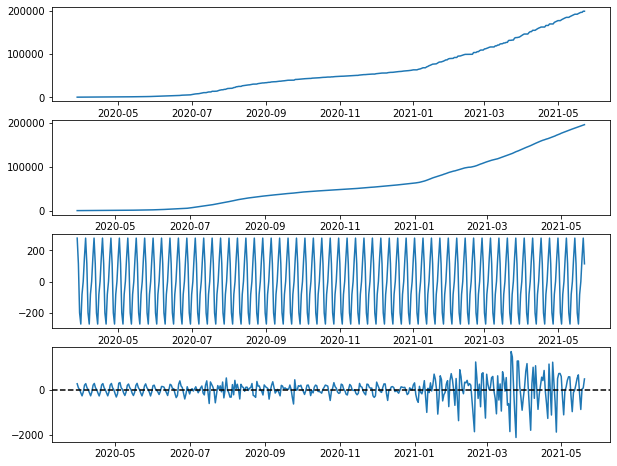

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(casos_BH.index, res.resid)
ax4.axhline(0, linestyle="dashed", color="black")
plt.show()

#### Modelando os dados utilizando ARIMA

In [ ]:
# instalando pacote necessário
! pip install pmdarima

In [27]:
# importando a biblioteca necessária
from pmdarima.arima import auto_arima

In [28]:
# criando o modelo ARIMA a partir dos dados
modelo = auto_arima(casos_BH)

In [29]:
# plotando os resultados do modelo
fig = go.Figure(go.Scatter(x=casos_BH.index, y=casos_BH, name="observados"))

fig.add_trace(go.Scatter(x=casos_BH.index, y=modelo.predict_in_sample(), name="preditos"))
fig.add_trace(go.Scatter(x=pd.date_range("2021-05-24", "2021-06-24"), y=modelo.predict(31), name="Forecast"))
fig.update_layout(title="Previsão de casos confirmados em Belo Horizonte para os próximos 30 dias")

fig.show()

#### Modelando de Crescimento

In [30]:
! pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
# importando a biblioteca necessária
from prophet import Prophet

In [32]:
# Preprocessamento dos dados

train = casos_BH.reset_index()[:-5]
test = casos_BH.reset_index()[-5:]

# Renomeando as colunas (exigencia da biblioteca)
train.rename(columns={"date":"ds", "casos":"y"}, inplace=True)
test.rename(columns={"date":"ds", "casos":"y"}, inplace=True)

# Definindo o modelo de crescimento
predicao = Prophet(growth='logistic', changepoints=['2020-05-04', '2020-07-02','2021-01-05', '2021-02-20'])

# Populacao Belo Horizonte - estimada 2021 (https://cidades.ibge.gov.br/brasil/mg/belo-horizonte/panorama)
# consulta realizada em 27/10/2022
pop_BH = 2530701
train["cap"] = pop_BH # cap referente à capacidade

# Treinando o modelo
predicao.fit(train)

# Construindo predicoes para o futuro
datas_futuras = predicao.make_future_dataframe(periods=1000)
datas_futuras["cap"] = pop_BH
forecast = predicao.predict(datas_futuras)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxrrrx45u/ri9tpg7t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxrrrx45u/6cvfm4lw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28672', 'data', 'file=/tmp/tmpxrrrx45u/ri9tpg7t.json', 'init=/tmp/tmpxrrrx45u/6cvfm4lw.json', 'output', 'file=/tmp/tmpxrrrx45u/prophet_model57qdki23/prophet_model-20221027231505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:15:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:15:06 - cmdstanpy - ERROR - Chain [1] 

In [33]:
# Plotando gráficos para demonstrar a predição
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name="Predicao"))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name="observados - treino"))
fig.update_layout(title="Predições de casos de COVID em Belo Horizonte-MG")
fig.show()

#### ----------------------------